# Exploratory Data Analysis (EDA)

This notebook contains code for exploratory data analysis (EDA) on the provided dataset. The EDA aims to gain insights into the data, identify patterns, and identify any potential issues or anomalies.

Here: the target variable is **'Sales_Quantity'**

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Get the dataset 
data = pd.read_csv('../data/Dataset/Train.csv')
data.head()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
0,26/09/24,Automotive,BrandA,3,0,17.9,462.30,33.96,359.45,227.0
1,26/09/24,Automotive,BrandA,3,0,66.3,321.28,24.76,49.47,370.0
2,26/09/24,Automotive,BrandA,3,0,14.4,74.85,32.19,245.11,299.0
3,26/09/24,Automotive,BrandA,3,0,34.7,469.12,43.68,144.08,426.0
4,22/09/24,Automotive,BrandA,6,1,93.5,221.76,36.79,478.07,470.0


In [3]:
# Get the information statistics of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  18483 non-null  object 
 1   Category              18483 non-null  object 
 2   Brand                 18483 non-null  object 
 3   Day_of_Week           18483 non-null  int64  
 4   Holiday_Indicator     18483 non-null  int64  
 5   Past_Purchase_Trends  18483 non-null  float64
 6   Price                 18483 non-null  float64
 7   Discount              18483 non-null  float64
 8   Competitor_Price      18483 non-null  float64
 9   Sales_Quantity        18019 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.4+ MB


In [4]:
# Get the descriptive statistics of the dataset
data.describe()

,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,18019.000000
mean,2.991235,0.142022,52.329465,275.111184,27.490937,259.858758,255.665631
std,2.000765,0.349083,27.410577,129.733609,13.022521,126.653165,141.179795
min,0.000000,0.000000,5.000000,50.070000,5.000000,40.070000,10.000000
25%,1.000000,0.000000,28.900000,163.315000,16.265000,149.530000,133.500000
50%,3.000000,0.000000,52.500000,275.150000,27.600000,260.260000,257.000000
75%,5.000000,0.000000,75.700000,387.650000,38.690000,368.520000,377.000000
max,6.000000,1.000000,100.000000,499.900000,49.990000,479.990000,499.000000


In [5]:
# convert the data to datetime format
data['Date'] = pd.to_datetime(data['Date']).dt.date

data = data.sort_values('Date')

data.head()

C:\Users\amuly\AppData\Local\Temp\ipykernel_6536\2931635137.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date']).dt.date


,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
14622,2021-01-05,Sports,BrandB,5,0,24.4,457.87,38.11,136.19,451.0
14991,2021-01-05,Sports,BrandC,5,0,59.1,98.34,12.54,70.34,125.0
4255,2021-01-05,Beauty,BrandE,5,0,54.9,262.91,42.77,173.73,483.0
12685,2021-01-05,Home,BrandC,5,0,79.6,342.60,35.44,443.02,209.0
2669,2021-01-05,Beauty,BrandA,5,0,36.7,271.56,18.94,349.97,388.0


In [6]:
data.tail()

,Date,Category,Brand,Day_of_Week,Holiday_Indicator,Past_Purchase_Trends,Price,Discount,Competitor_Price,Sales_Quantity
7423,2024-12-07,Clothing,BrandB,4,0,56.4,219.54,13.14,274.24,274.0
7422,2024-12-07,Clothing,BrandB,4,0,97.3,119.73,6.13,96.05,246.0
17680,2024-12-07,Toys,BrandE,4,0,5.3,315.86,19.04,73.55,43.0
7425,2024-12-07,Clothing,BrandB,4,0,78.3,298.49,40.46,166.55,347.0
3499,2024-12-07,Beauty,BrandD,4,0,92.4,146.17,21.19,298.00,305.0


## Data Validation checks

In [7]:
# Check for duplicate values
data.duplicated().sum()

0

There are no duplicate values in the dataset.

#### Missing values

In [8]:
# check for missing values
data.isna().sum()

Date                      0
Category                  0
Brand                     0
Day_of_Week               0
Holiday_Indicator         0
Past_Purchase_Trends      0
Price                     0
Discount                  0
Competitor_Price          0
Sales_Quantity          464
dtype: int64

In [9]:
# View the rows with missing values
missing_rows = data[data['Sales_Quantity'].isna()]

In [10]:
# Calculate the percentage of missing values
missing_rows_percentage = (missing_rows.shape[0] / data.shape[0]) * 100

missing_rows_percentage

2.510414975923822

We can drop the rows with missing values as they represent a small percentage of the total dataset.

In [11]:
data.dropna(inplace=True)
data.sort_values("Date", inplace=True)


## Time Series Plots

### Time Series Plot

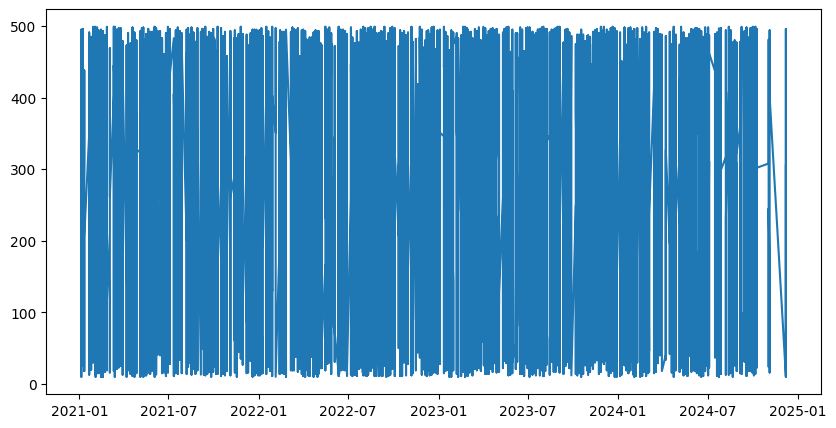

In [17]:
# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(data["Date"], data["Sales_Quantity"])
plt.show()

### Seasonal Decomposition Plots

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'Date' is in datetime format and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index("Date", inplace=True)

# Perform seasonal decomposition
additive_results = seasonal_decompose(data['Sales_Quantity'], model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

# Exploratory Data Analysis (EDA) using SweetViz

In [ ]:
import sweetviz as sv

# Generate a SweetViz report

report = sv.analyze(data, target_feat='Sales_Quantity')

# Save the report to a HTML file
report.show_html('../eda_report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
